# Computational Geometry

## Computing Integrals with Monte Carlo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
#coordinates of the vertices
A = (4,0)
B = (3,4)
C = (0,1)

In [28]:
def area(A, B, C):
    return 1/2*(4*(4-1)+3*(1-0)+0*(0-4))

In [4]:
def points_on_triangle(A, B, C, N, method):
    
    #generate N random points for r1, r2, and r3
    r1, r2, r3 = np.random.random(N), np.random.random(N), np.random.random(N)
    
    #method 1
    if method == 1:
        #calculate method 1
        alpha = (r1/(r1+r2+r3))
        beta = (r2/(r1+r2+r3))
        rho = (r3/(r1+r2+r3))
    
    #method 2 
    if method == 2:
        #if r1 and r2 is greater than 1 
        for i in range(N):
            if (r1[i] + r2[i]) > 1:
                #replace r1 by 1 - r1 and r2 by 1 - r2
                r1[i] = 1 - r1[i]
                r2[i] = 1 - r2[i]
        #calculate method 2
        alpha = (1 - r1 - r2)
        beta = r1
        rho = r2
    
    #method 3
    if method == 3:
        #calculate method 3
        alpha = 1 - np.sqrt(r1)
        beta = np.sqrt(r1)*r2
        rho = np.sqrt(r1)*(1-r2)
    
    #calculate points 
    p = [alpha[i]*np.array(A) + beta[i]*np.array(B) + rho[i]*np.array(C) for i in range(N)] 
    
    #split points into x and y coordinates 
    x, y = zip(*p)
      
    #return coordinates
    return x, y

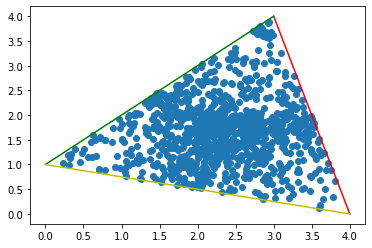

In [5]:
x, y = points_on_triangle(A,B,C,1000,1)
plt.plot((A[0],B[0]),(A[1],B[1]), color='r')
plt.plot((B[0],C[0]),(B[1],C[1]), color='g')
plt.plot((A[0],C[0]),(A[1],C[1]), color='y')
plt.scatter(x,y)

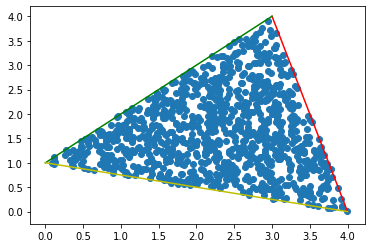

In [6]:
x, y = points_on_triangle(A,B,C,1000,2)
plt.plot((A[0],B[0]),(A[1],B[1]), color='r')
plt.plot((B[0],C[0]),(B[1],C[1]), color='g')
plt.plot((A[0],C[0]),(A[1],C[1]), color='y')
plt.scatter(x,y)

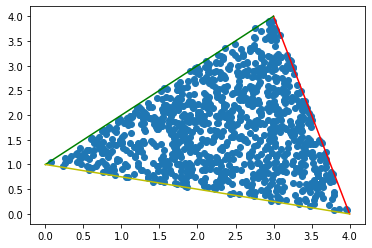

In [7]:
x, y = points_on_triangle(A,B,C,1000,3)
plt.plot((A[0],B[0]),(A[1],B[1]), color='r')
plt.plot((B[0],C[0]),(B[1],C[1]), color='g')
plt.plot((A[0],C[0]),(A[1],C[1]), color='y')
plt.scatter(x,y)

The three triangles all show 1000 random points within a triangle given vertices A, B, and C (defined in earlier cells). The first scatter plot has more random points oriented towards the center of the triangle and loose points towards the edges. The next two plots are similar, it looks like the random points are dispersed throughout the triangle.

In [8]:
def mc(A, B, C, N, f, method):
    
    #initialize error array 
    err = []
    
    #calculate area 
    T = area(A, B, C)
    
    #exact value of the integral 
    exact = 72.5
    
    #initialize integral calculation variable
    calc = np.zeros(100)
    
    #MC method
    #loop through each N value
    for h in N:
        #at each N value calculate the approximate of the integral 
        for i in range(100):
            #calculate points
            x, y = points_on_triangle(A, B, C, h, method)
            #calculate the approximate of the integral 
            calc[i] = np.abs(T)*(1/h)*np.sum(f(x, y))
        
        #take the mean of all the approximations
        approx = np.mean(calc)
        
        #calculate the error by subtracting the approximate solution from the exact
        #appen error values to err array 
        E = abs(approx - exact)
        err.append(E)
    
    #plot loglog to calculate convergence 
    plt.loglog(N, err)
    
    #return the approximate solution
    return approx

Approximate solution 67.96534530479124


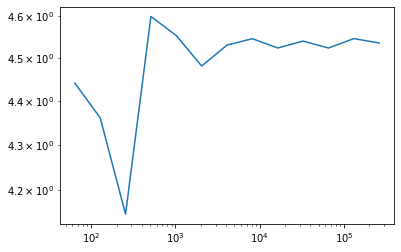

In [9]:
f = lambda x, y: np.power(x, 2) + np.power(y, 2)

N = np.asarray([2**x for x in range(6, 19)])

approx = mc(A, B, C, N, f, 1)
print('Approximate solution',approx)

Approximate solution 72.50840252145618


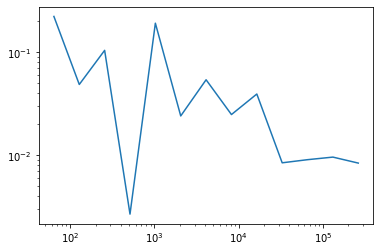

In [10]:
approx = mc(A, B, C, N, f, 2)
print('Approximate solution',approx)

Approximate solution 72.51155374803781


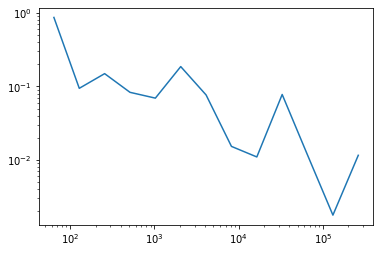

In [11]:
approx = mc(A, B, C, N, f, 3)
print('Approximate solution',approx)

## Computing Integrals With Quadrature 

In [50]:
def quadrature(A, B, C, f, method):
    
    #calculate the area of the triangle given the verices
    a = area(A, B, C)
    
    #first order quadrature n = 3
    if method == 1:
        
        #set x and y 
        x = np.array([1, 0, 0])
        y = np.array([0, 1, 0])
        
        #initialize X and Y
        X = np.zeros(len(x))
        Y = np.zeros(len(y))
        
        #calculate the quadrature points using the change of coordinates 
        for i in range(len(x)):
            X[i], Y[i] = np.array(A)*x[i] + np.array(B)*y[i] + np.array(C)*(1 - x[i] - y[i])
        
        #approximate the integral using the quadrature formula 
        approx = abs(a)*np.sum((1/3)*f(X,Y))
        
    if method == 2:
        
        x = np.array([0.816847572980459, 0.091576213509771, 0.091576213509771, 0.108103018168070, 0.445948490915965, 0.445948490915965])
        y = np.array([0.091576213509771, 0.816847572980459, 0.091576213509771, 0.445948490915965, 0.108103018168070, 0.445948490915965])
        w = np.array([0.109951743655322, 0.109951743655322, 0.109951743655322, 0.223381589678011, 0.223381589678011, 0.223381589678011])
        
        X = np.zeros(len(x))
        Y = np.zeros(len(y))
        
        for i in range(len(x)):
            X[i], Y[i] = np.array(A)*x[i] + np.array(B)*y[i] + np.array(C)*(1 - x[i] - y[i])
            
        approx = abs(a)*np.sum(w*f(X,Y))
        
    return np.round(approx,1)

In [52]:
f = lambda x, y: np.power(x, 2) + np.power(y, 2)

q = quadrature(A, B, C, f, 2)
print(q)

72.5
